## Emily Farr - Plotting Asteroids

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy.table import QTable

### The file `SDSS_MainBelt.csv` contains data on objects in the asteroid belt collected by the [Sloan Digital Sky Survey](http://www.sdss.org/).

The columns are:
- **`Name`** - Object name
- **`a`** - semi-major axis
- **`cA`** - SDSS a$^*$ color
- **`cI`** - SDSS i color (near infrared)
- **`cZ`** - SDSS z color (infrared)
- **`X`** - X position [au] - Sun-centered coords (10/29/2014)
- **`Y`** - Y position [au] - Sun-centered coords (10/29/2014)
- **`Z`** - Z position [au] - Sun-centered coords (10/29/2014)

## Read in the file `SDSS_MainBelt.csv`

In [3]:
asteroid_table = QTable.read('SDSS_MainBelt.csv', format='ascii.csv')
print(asteroid_table)

      Name          a        cA    cI    cZ    X      Y      Z   
--------------- ---------- ----- ----- ----- ------ ------ ------
        1989_SS 3.02581223  0.05  17.1 17.05  1.214 -2.976   0.57
        Helenos  5.2970754 -0.01 17.79 17.67  1.329  5.143 -1.275
     2003_YD179 5.30062353  0.04 20.07 19.97  1.203  5.328  0.549
      2007_EW43 5.16246243 -0.05 20.21 20.41  1.908  5.004 -1.534
       1989_UE5 5.17070558  0.07 20.03 19.96  1.915  4.811 -1.037
       1992_UD3 2.37429763  0.14  16.7  16.7  1.426  1.405  0.029
     1999_RW114 3.05070445  0.08 18.46 18.43  0.633 -2.753 -0.125
     1999_RQ104  3.1150167 -0.05 17.86 17.81 -1.107 -2.919   0.39
     1999_RG165 3.12340483 -0.07 18.25 18.31 -1.419  -2.21 -0.694
       1990_RD5 2.73696073 -0.03 17.43 17.34   -1.5  2.229 -0.174
            ...        ...   ...   ...   ...    ...    ...    ...
          Ouzan 2.88016187  0.09 17.04 17.06 -1.237  2.622   0.11
        1975_NC 2.74520599  0.12 17.07 17.19 -2.433  1.559 -0.246
      2001

## The Color of the Asteroids 
- Make three (3) plots in one row
- In each panel, plot a histogram of the semi-major axis (`a`) for **all** of the asteroids.
- Bins = 100.
- Only show 2.0 AU < `a` < 3.6 AU
- In the first panel, overplot a histogram of `a` for C-Type asteroids only.
- In the first panel, overplot a histogram of `a` for S-Type asteroids only.
- In the first panel, overplot a histogram of `a` for V-Type asteroids only.
- In each panel, draw a vertical line at `a` = mean(`a`) for that type of asteroid.
- Adjust the color and transparency of the overplotted histograms so that it is easy to see.
- The asteroid types can be determined from their colors (see image below).
- Output size w:15in, h:5in
- Make the plot look nice (including clear labels)

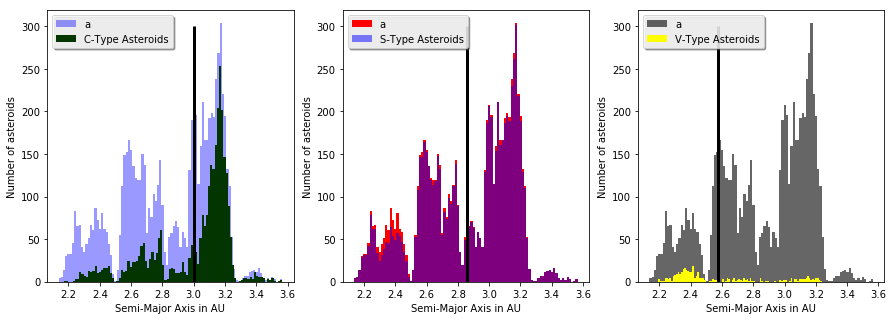

In [4]:
mask1 = np.where((asteroid_table['a'] > 2.0) & (asteroid_table['a'] < 3.6))
asteroid_table_new = asteroid_table[mask1]
mask2 = np.where(asteroid_table_new['cA'] < 0)
mask3 = np.where((asteroid_table_new['cI'] - asteroid_table_new['cZ'] > -0.15))
mask4 = np.where((asteroid_table_new['cI'] - asteroid_table_new['cZ'] < -0.15))
a = asteroid_table_new['a']
fig, ax = plt.subplots(1,3)                                               
fig.set_size_inches(15,5) 

mean1 = np.mean(a[mask2])
mean2 = np.mean(a[mask3])
mean3 = np.mean(a[mask4])

ax[0].hist(a, bins=100, facecolor='blue',  alpha = 0.40);
ax[0].hist(a[mask2], bins=100, facecolor='xkcd:dark green', label = 'C-Type Asteroids');
ax[1].hist(a, bins=100, facecolor='red');
ax[1].hist(a[mask3], bins=100, facecolor='blue', alpha = 0.50, label = 'S-Type Asteroids');
ax[2].hist(a, bins=100, facecolor='black', alpha = 0.60);
ax[2].hist(a[mask4], bins=100, facecolor='yellow', label = 'V-Type Asteroids');

ax[0].vlines(mean1,0,300, color='black', linewidth=3)
ax[1].vlines(mean2,0,300, color='black', linewidth=3)
ax[2].vlines(mean3,0,300, color='black', linewidth=3)

ax[0].set_xlabel("Semi-Major Axis in AU")
ax[0].set_ylabel("Number of asteroids")
ax[1].set_xlabel("Semi-Major Axis in AU")
ax[1].set_ylabel("Number of asteroids")
ax[2].set_xlabel("Semi-Major Axis in AU")
ax[2].set_ylabel("Number of asteroids")
ax[0].legend(loc=0,shadow=True);
ax[1].legend(loc=0,shadow=True);
ax[2].legend(loc=0,shadow=True);

## The Position of the Asteroids 
- Make a 3D plot of X vs Y vs Z for the asteroids
- Orient the plot so you can see the 3D structure of the asteroid belt
- Output size w:9in, h:9in
- Make the plot look nice

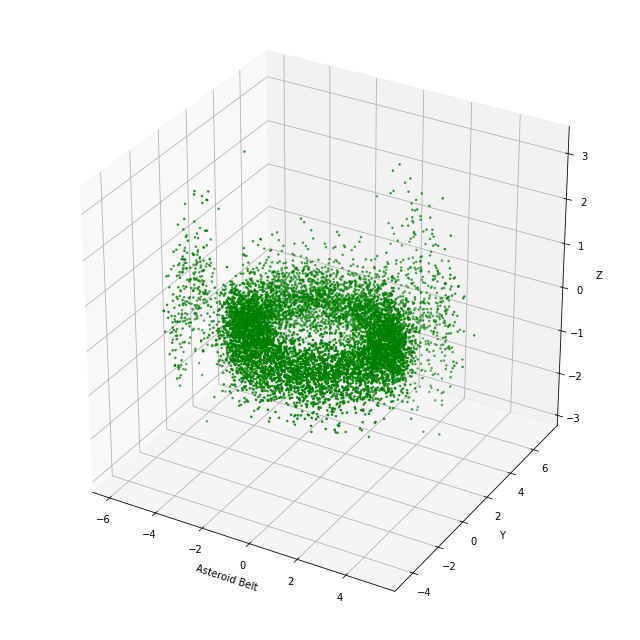

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fig.set_size_inches(9,9)

fig.tight_layout()

xx = asteroid_table['X']
yy = asteroid_table['Y']
zz = asteroid_table['Z']

ax.scatter(xx, yy, zz, c = "green", s = 2.5)

ax.set_xlabel('Asteroid Belt')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

---

### Asteroid classes - SDSS Colors

---

<center><img src="images/Colors.jpg" width=600px></center>

### Due Thurs Nov 02 - 5pm
- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  